## 1. Loading the Dataset

In [1]:
with open("/content/drive/MyDrive/Deep Learning/DL Project 4/next_word_predictor.txt", "r", encoding="utf-8") as f:
    corpus = f.read()   # Reads the entire content of the file as one long string and stores in the variable "corpus"
print(len(corpus), "characters in corpus") # total number of characters (not words!)

167445 characters in corpus


In [2]:
# encoding="utf-8" ensures all text characters (including special characters, emojis, foreign words, etc.) are read correctly — a must for NLP tasks.


In [3]:
import re
import matplotlib.pyplot as plt
import numpy as np

# Split corpus into sentences using punctuation (before cleaning)
sentences = re.split(r'[.!?]', corpus)  # Split wherever you find a period (.), exclamation mark (!), or question mark (?).

# Get word counts per sentence
sentence_lengths = [len(s.split()) for s in sentences if len(s.split()) > 0]

# For every sentence:
  # s.split() splits it into words (by spaces).
  # len(s.split()) counts how many words are in that sentence.
  # if len(s.split()) > 0 => Filtering out empty strings

print("Total sentences:", len(sentence_lengths))
print("Min length:", min(sentence_lengths))
print("Max length:", max(sentence_lengths))
print("Average length:", sum(sentence_lengths) / len(sentence_lengths))

Total sentences: 2825
Min length: 1
Max length: 71
Average length: 9.885309734513275


In [4]:
print(sentence_lengths)

[21, 20, 9, 21, 13, 11, 28, 13, 23, 15, 15, 17, 11, 14, 20, 13, 15, 19, 17, 18, 16, 16, 22, 16, 25, 26, 15, 14, 22, 11, 14, 25, 24, 15, 9, 16, 11, 18, 27, 22, 18, 16, 23, 19, 19, 15, 17, 18, 20, 31, 28, 25, 20, 16, 19, 16, 9, 24, 11, 16, 15, 10, 14, 14, 11, 14, 21, 19, 16, 19, 15, 20, 13, 25, 7, 12, 24, 18, 29, 23, 13, 25, 23, 15, 21, 13, 12, 13, 16, 16, 14, 19, 12, 18, 9, 15, 14, 17, 22, 17, 28, 11, 16, 17, 13, 12, 14, 21, 20, 20, 31, 25, 17, 19, 22, 15, 12, 11, 15, 20, 11, 12, 13, 10, 17, 17, 18, 35, 28, 21, 11, 26, 12, 27, 27, 11, 18, 14, 9, 18, 19, 15, 32, 21, 20, 18, 10, 10, 13, 13, 16, 24, 11, 21, 17, 12, 19, 17, 19, 34, 24, 28, 14, 23, 12, 14, 15, 15, 11, 25, 15, 16, 17, 14, 18, 37, 21, 21, 16, 8, 14, 14, 16, 11, 16, 18, 18, 14, 19, 16, 17, 11, 19, 32, 39, 22, 12, 29, 19, 18, 11, 10, 9, 14, 12, 21, 20, 22, 33, 9, 8, 27, 16, 16, 20, 18, 7, 7, 26, 20, 19, 33, 21, 16, 20, 12, 25, 20, 9, 26, 24, 10, 17, 19, 15, 15, 20, 40, 19, 27, 26, 25, 18, 41, 21, 23, 25, 13, 13, 9, 8, 31, 25, 22

In [5]:
# something smart here: we’re exploring our text before cleaning or tokenizing it
# which gives us an intuition about how our dataset is structured.

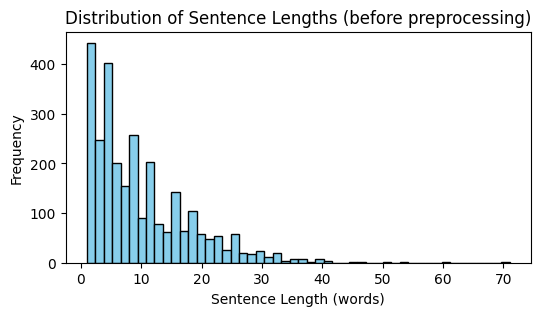

In [6]:
# Plot distribution
plt.figure(figsize=(6,3))
plt.hist(sentence_lengths, bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Sentence Length (words)")
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Lengths (before preprocessing)")
plt.show()

In [7]:
# The above histogram shows how the lengths of sentences are distributed.

# for LSTM/GRU models, the sequence length matters.
# It affects:
    # Memory consumption
    # Training speed
    # The model’s ability to capture context

In [8]:
# For Example:- If most sentences are 5–15 words, setting maxlen=70 (in case this is our true maximum) is wasteful.

In [9]:
import numpy as np

for p in [50, 75, 90, 95, 99]:
    print(f"{p}th percentile length:", np.percentile(sentence_lengths, p))

# 90% of sentences are having lengths less than 21 tokens
# Only 10% of sentences are longer than 21 tokens.

50th percentile length: 7.0
75th percentile length: 14.0
90th percentile length: 21.0
95th percentile length: 26.0
99th percentile length: 36.0


In [10]:
# Why This Analysis Matters
  # It avoids unnecessary padding => As we got max_length = 71 in one of the above analysis,
                                # => Just by looking at this number if we set max_length = 71, then:
                                  # 90% of our sequences (≤ 21 words) will be padded up to 71
                                  # Waste of computation
                                  # Slower training
                                  # More memory usage
                                  # Higher chance of overfitting

* So if we set sequence_length = 21 (or round to 20), we’ll cover the vast majority of sentences without too much padding.

In [11]:
# Too short → model can't learn context
# Too long → wasted memory and slower training
# Percentiles → realistic estimation of natural language structure

## 2. Preprocessing the Text

In [12]:
import re

# Basic cleaning
corpus = corpus.lower()    # lower casing
corpus = re.sub(r"[^a-zA-Z0-9.,!?;:'\-\s]", "", corpus)  # This keeps: Lowercase letters, Uppercase, Numbers, Punctuation, spaces

# Tokenize
words = corpus.split()     # splitting text into words
print("Total words:", len(words))

Total words: 27639


In [13]:
words

['the',
 'sun',
 'was',
 'shining',
 'brightly',
 'in',
 'the',
 'clear',
 'blue',
 'sky,',
 'and',
 'a',
 'gentle',
 'breeze',
 'rustled',
 'the',
 'leaves',
 'of',
 'the',
 'tall',
 'trees.',
 'people',
 'were',
 'out',
 'enjoying',
 'the',
 'beautiful',
 'weather,',
 'some',
 'sitting',
 'in',
 'the',
 'park,',
 'others',
 'taking',
 'a',
 'leisurely',
 'stroll',
 'along',
 'the',
 'riverbank.',
 'children',
 'were',
 'playing',
 'games,',
 'and',
 'laughter',
 'filled',
 'the',
 'air.',
 'as',
 'the',
 'day',
 'turned',
 'into',
 'evening,',
 'the',
 'temperature',
 'started',
 'to',
 'drop,',
 'and',
 'the',
 'sky',
 'transformed',
 'into',
 'a',
 'canvas',
 'of',
 'vibrant',
 'colors.',
 'families',
 'gathered',
 'for',
 'picnics,',
 'and',
 'the',
 'smell',
 'of',
 'barbecues',
 'wafted',
 'through',
 'the',
 'air.',
 'it',
 'was',
 'a',
 'perfect',
 'day',
 'for',
 'a',
 'picnic',
 'by',
 'the',
 'lake.',
 'in',
 'the',
 'distance,',
 'you',
 'could',
 'hear',
 'the',
 'sound',

### Encoding

In [14]:
# Before feeding text to an LSTM model, we must convert words → numbers.
# Neural networks only understand numbers, not text.

In [15]:
# from collections import Counter

# Special tokens first
word_to_index = {
    "<PAD>": 0,   # padding
    "<UNK>": 1    # unknown words
}

# Then add the rest of the vocab starting from 2
for i, w in enumerate(sorted(set(words))):   # enumerate(...) => loops with automatic numbering
    if w not in word_to_index:   # avoid overwriting <PAD>, <UNK>
        word_to_index[w] = len(word_to_index)

# word_to_index => maps each word to a unique integer

# Reverse mapping => (used to decode predictions)
index_to_word = {i: w for w, i in word_to_index.items()}

print("Vocab size:", len(word_to_index))  # includes PAD + UNK
pad_idx = word_to_index["<PAD>"]
unk_idx = word_to_index["<UNK>"]

Vocab size: 6999


In [16]:
word_to_index

{'<PAD>': 0,
 '<UNK>': 1,
 "'anyway'...": 2,
 "'big": 3,
 "'billy,": 4,
 "'cause": 5,
 "'cause,": 6,
 "'cause....": 7,
 "'cross": 8,
 "'dear": 9,
 "'doy'": 10,
 "'dumped'.": 11,
 "'em": 12,
 "'for": 13,
 "'g.stephanopoulos?'": 14,
 "'gee,": 15,
 "'glowing": 16,
 "'ha,": 17,
 "'hat'": 18,
 "'hi": 19,
 "'i": 20,
 "'i'm": 21,
 "'involved'?": 22,
 "'it": 23,
 "'it's": 24,
 "'l'-shaped": 25,
 "'look,": 26,
 "'n'": 27,
 "'not": 28,
 "'not-mine.": 29,
 "'not-not-mine,": 30,
 "'one": 31,
 "'our": 32,
 "'pl'.": 33,
 "'s'funny,": 34,
 "'s'going": 35,
 "'there": 36,
 "'to": 37,
 "'we": 38,
 "'what": 39,
 "'why": 40,
 "'yes',": 41,
 "'you": 42,
 "'you're": 43,
 ',': 44,
 '-': 45,
 '--': 46,
 '-big': 47,
 '-but': 48,
 '-but,': 49,
 '-football': 50,
 "-i'd": 51,
 '-if': 52,
 '-leg?': 53,
 '-peaches?': 54,
 '-she,': 55,
 '-the': 56,
 '-what': 57,
 '.....oh': 58,
 '.....well,': 59,
 '...and': 60,
 '...as': 61,
 '...dinah?': 62,
 '...does': 63,
 '...hi.': 64,
 '...how': 65,
 '...i': 66,
 "...i'll": 67,

In [17]:
print(list(word_to_index.items())[:20])

[('<PAD>', 0), ('<UNK>', 1), ("'anyway'...", 2), ("'big", 3), ("'billy,", 4), ("'cause", 5), ("'cause,", 6), ("'cause....", 7), ("'cross", 8), ("'dear", 9), ("'doy'", 10), ("'dumped'.", 11), ("'em", 12), ("'for", 13), ("'g.stephanopoulos?'", 14), ("'gee,", 15), ("'glowing", 16), ("'ha,", 17), ("'hat'", 18), ("'hi", 19)]


In [18]:
print(list(index_to_word.items())[:20])

[(0, '<PAD>'), (1, '<UNK>'), (2, "'anyway'..."), (3, "'big"), (4, "'billy,"), (5, "'cause"), (6, "'cause,"), (7, "'cause...."), (8, "'cross"), (9, "'dear"), (10, "'doy'"), (11, "'dumped'."), (12, "'em"), (13, "'for"), (14, "'g.stephanopoulos?'"), (15, "'gee,"), (16, "'glowing"), (17, "'ha,"), (18, "'hat'"), (19, "'hi")]


- This step gives us discrete integer IDs for each word.

- Problem: these integers don’t carry any meaning.
- For example, does dog=123 being greater than cat=45 mean dog is "larger" or "better"?
  - No. It's just an arbitrary label.

- So → encoding gives unique IDs but no semantic meaning

- Still, at this stage, the numbers are just word IDs, not meaningful vectors.

# Padding
- Padding just makes sure all input sequences are of equal length.

- It’s not like fixed chunks of 20 tokens (1–20, 21–40, …).
- Instead, it’s usually overlapping sliding windows (shifted by 1 token each time), because for language models, we want to preserve context.

  - If your sequence_length = 20, you’d get:

  - Tokens [1–20] → target: token 21

  - Tokens [2–21] → target: token 22

  - Tokens [3–22] → target: token 23
  and so on…

This way, the model learns sequential dependencies, not just chunk-based data.

In [19]:
# Captures context by moving one step at a time.

In [20]:
# Padding comes after windowing.

In [21]:
# This is exactly the sliding-window sequence generation step.

sequence_length = 28  # each sequence length contains 28 words and 29th will be the target | Every input sequence has the same length | No sequence is shorter & No sequence needs padding
sequences = []  # This will store pairs of: (input_sequence_28_words, target_word)

for i in range(sequence_length, len(words)):  # If i = 28, then sequence = words[0:28]
                                              # If i = 100, then sequence = words[72:100]
  seq = words[i-sequence_length:i] # seq = words[0:28]  # tokens 1–28
                                   # target = words[28] # token 29
  target = words[i]
  sequences.append((seq, target))

print(sequences)

Output hidden; open in https://colab.research.google.com to view.

In [22]:
# # Example shows how the above given approach works

# text = "I love deep learning models a lot"
# words = ["I", "love", "deep", "learning", "models", "a", "lot"]

# seq_length = 4
# sequs = []
# for i in range(seq_length, len(words)):
#   seq = words[i-seq_length:i] # takes 10 words
#   target = words[i]
#   sequs.append((seq, target))

# sequs

In [23]:
pad_idx = word_to_index["<PAD>"]
unk_idx = word_to_index["<UNK>"]

In [24]:
# Encode sequences with <UNK> handling

# we already have word_to_index and index_to_word.
# We’ll now convert each (seq, target) into integer tensors.

import torch

encoded_sequences = []
encoded_targets = []

pad_idx = word_to_index["<PAD>"]
unk_idx = word_to_index["<UNK>"] # pad_idx, unk_idx → integers for special tokens

for seq, target in sequences:
    # Convert words in seq into indices, map unknown words to <UNK>, Convert sequence of words → sequence of integers
    encoded_seq = torch.tensor(
        [word_to_index.get(word, unk_idx) for word in seq], # => If word is found → return its integer index, If not found → return index of <UNK>
        dtype=torch.long
    )
    encoded_sequences.append(encoded_seq)

    # Encode the target word
    encoded_targets.append(word_to_index.get(target, unk_idx))

targets = torch.tensor(encoded_targets, dtype=torch.long)

print("Example encoded sequence:", encoded_sequences[0])
print("Example target:", targets[0])


Example encoded sequence: tensor([6097, 5906, 6649, 5446,  823, 3096, 6097, 1156,  736, 5534,  340,  131,
        2520,  815, 5228, 6097, 3514, 4237, 6097, 6006, 6325, 4509, 6734, 4361,
        1983, 6097,  622, 6699])
Example target: tensor(5613)


What this does

If a word is in vocab → use its index.

If a word is missing → mapped to <UNK> (1).

Padding is not yet applied here — we’ll do that next step.

In [25]:
# Apply Padding

# We’ll pad all sequences to the same length using PyTorch’s pad_sequence.
# This ensures that every sequence has equal length (required for batching).

from torch.nn.utils.rnn import pad_sequence   # pad_sequence takes a list of tensors and pads them to equal length.

# Pad sequences with <PAD> index
pad_idx = word_to_index["<PAD>"]

padded_sequences = pad_sequence(
    encoded_sequences,  # list of tensors (each tensor = encoded sequence), Each tensor currently has shape (28,)
    batch_first=True,   # shape: (batch, seq_len)
    padding_value=pad_idx
)

print("Shape of padded sequences:", padded_sequences.shape)
print("Example padded sequence:", padded_sequences[0])

Shape of padded sequences: torch.Size([27611, 28])
Example padded sequence: tensor([6097, 5906, 6649, 5446,  823, 3096, 6097, 1156,  736, 5534,  340,  131,
        2520,  815, 5228, 6097, 3514, 4237, 6097, 6006, 6325, 4509, 6734, 4361,
        1983, 6097,  622, 6699])


In [26]:
# That means our dataset has 27,611 sentences, and after padding we’ve made each sentence have a fixed length of 28 tokens.
# Any sequence shorter than 28 got <PAD> added.
# Any sequence longer than 28 got truncated.

## Word Embeddings




In [27]:
# Embedding Layer

import torch.nn as nn

# total vocabulary size
vocab_size = len(word_to_index)

# embedding dimension (tunable hyperparameter)
embedding_dim = 100

# embedding layer
embedding = nn.Embedding(
    num_embeddings = vocab_size,
    embedding_dim = embedding_dim,
    padding_idx = pad_idx
)

In [28]:
embedding

Embedding(6999, 100, padding_idx=0)

In [29]:
# This created a matrix with:
  # rows = vocab_size = 6999
  # columns = embedding_dim = 100

In [30]:
# Each row corresponds to one word.

# Row 0 → <PAD>
# Row 1 → <UNK>
# Row 2 → "apple"
# Row 3 → "story"
# ...
# Row 4967 → last word

# Initially, all rows contain random values — they will be learned during training.

In [31]:
# Our sequence tensors look like:
  # tensor([45, 78, 22, 901, ...])   # word indices

# When passed into the embedding layer:
  # embedding(tensor([45, 78, 22]))

# It becomes:
# tensor([
#    [0.12, -0.89, ..., 0.33],   # word 45 vector
#    [-1.03, 0.55, ..., 0.91],   # word 78 vector
#    [0.77, 0.12, ..., -0.60]    # word 22 vector
# ])

# IDs → semantic vectors

### In short:

- Encoding = assign IDs (unique, no meaning)

- Padding = equalize sequence lengths (still IDs)

- Embedding = convert IDs into meaningful numeric vectors that models can learn from

### passing token IDs → embeddings (and sanity-check)

In [32]:
import torch

# confirming the dtype is long (required by nn.Embedding)
if padded_sequences.dtype != torch.long:      # nn.Embedding requires indices to be of type LongTensor, float → not allowed, int64/long → required
  padded_sequences = padded_sequences.long()

# taking a small batch (first 4 example sequences)
x_batch = padded_sequences[:4]   # shape: [4,21]
print("x_batch shape:", x_batch.shape)
# x_batch -> is just integers = word IDs.


# passing through embedding layer -> converts -> Integer IDs → dense vectors
embd_out = embedding(x_batch)    # shape: [4, 28, 100]
print("embd_out shape:", embd_out.shape)
# Every token ID is now replaced with a 100-dimensional vector (our embedding_dim).
# For each of the 4 sequences → 28 tokens → each token becomes a [100] vector.
# So we get [batch_size, seq_len, embedding_dim].

# peek at the first sequence: first 10 token ids and their embeddings
print("first 10 token IDs:", x_batch[0, :10])
print("embeddings tensor slice shape:", embd_out[0, :10].shape)  # [10, 100]

# confirm PAD row is the zero vector
print("PAD row is zero vector:", bool(torch.all(embedding.weight[pad_idx] == 0)))

# Each <PAD> token in our sequence gets mapped to a row of 100 zeros
# If our sequence had, say, 5 <PAD> tokens, then in the output embedding tensor we’d see 5 separate [100] zero vectors in those positions.

# This way, padding tokens don’t contribute any signal when you pass the embeddings into an LSTM/GRU/Transformer.

x_batch shape: torch.Size([4, 28])
embd_out shape: torch.Size([4, 28, 100])
first 10 token IDs: tensor([6097, 5906, 6649, 5446,  823, 3096, 6097, 1156,  736, 5534])
embeddings tensor slice shape: torch.Size([10, 100])
PAD row is zero vector: True


In [33]:
# Example:
# our first 10 tokens [4383, 4246, 4763, …] each is turned into a [100] vector.
# So embeddings tensor slice shape: [10, 100]

In [34]:
# Now we have padded_sequences and targets
# So, we'll wrap them into a PyTorch Dataset so batching and shuffling become easy.

## Dataset & DataLoader Setup

In [35]:
from torch.utils.data import Dataset, DataLoader

class NextWordDataset(Dataset):    # It wraps our training data in an object PyTorch understands.
  def __init__(self, sequences, targets):
    self.sequences = sequences
    self.targets = targets

  def __len__(self):      # Tells PyTorch how many training samples we have.
    return len(self.sequences)

  def __getitem__(self, idx):
    return self.sequences[idx], self.targets[idx]    # Returns one training example when PyTorch requests it => (sequence_tensor, target_tensor)

# dataset
dataset = NextWordDataset(padded_sequences, targets)

# Creating DataLoader
# train_loader
batch_size = 64
train_loader = DataLoader(dataset, batch_size = batch_size, shuffle = True)


In [36]:
# Summary of What This Step Achieves

# We have now packaged our data into a fully workable training pipeline:
    # Sequences + targets combined into a unified dataset
    # Ready for mini-batch gradient descent
    # Efficient batching using DataLoader
    # Automatic shuffling each epoch
    # Works perfectly with LSTM/GRU models

## Defining the Model
- Typical structure → Embedding → LSTM → Fully Connected → Softmax.

In [37]:
class NextWordPredictor(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, pad_idx):
    super(NextWordPredictor, self).__init__()

# our model has 3 layers in sequence:
  # 1. Embedding Layer
    self.embedding = nn.Embedding(
        num_embeddings = vocab_size,
        embedding_dim = embedding_dim,
        padding_idx = pad_idx
    )

  # 2. LSTM Layer
    self.lstm = nn.LSTM(
        input_size = embedding_dim,
        hidden_size = hidden_dim,
        num_layers = num_layers,
        batch_first = True
    )

  # 3. Fully Connected Layer
    self.fc = nn.Linear(hidden_dim, vocab_size)

  def forward(self, x):
    emb = self.embedding(x)       # [batch, seq_len, embed_dim]
    out, _ = self.lstm(emb)       # [batch, seq_len, hidden_dim]

    # This final hidden state represents the model’s understanding of the entire sentence so far.
    out = out[:, -1, :]           # takes last hidden state => Shape becomes: [batch, hidden_dim]
    logits = self.fc(out)         # [batch, vocab_size]
    return logits       # This gives one score for each possible next word in the vocabulary.

In [38]:
# Input to and Output from Embedding Layer
  # Input: x = token IDs → shape: [batch, seq_len]
  # Output: embeddings → shape: [batch, seq_len, embedding_dim]
# ---------------------------------------------------------------------
# Input to LSTM and output from LSTM
  # Input: embeddings → [batch, seq_len, embedding_dim]
  # Output:
    # out → LSTM output at every time step
    # shape: [batch, seq_len, hidden_dim]
    # _ → hidden + cell states (we don’t use them)
    # This means for a sequence of length 28:
    # → we get 28 hidden states, but we use only the hidden state of the last token.
# -----------------------------------------------------------------------------------------
# Fully Connected Layer
    # Input: [batch, hidden_dim]
    # Output: [batch, vocab_size]


In [39]:
# The pipeline is:

# Token IDs → Embeddings → LSTM → Last Hidden → Linear → Vocabulary scores

## Training Setup

In [40]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [41]:
device

device(type='cuda')

In [42]:
model = NextWordPredictor(
    vocab_size = vocab_size,
    embedding_dim = 100,
    hidden_dim = 256,
    num_layers = 2,  # 2-layer LSTM
    pad_idx = pad_idx
).to(device)

In [43]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

## Training Loop

In [44]:
from tqdm import tqdm

num_epochs = 15
epoch_loss = []

for epoch in range(num_epochs):
  model.train()   # enables dropout, grads / sets the model in train mode
  total_loss = 0  # Tracks total loss per epoch

  # loop = tqdm(train_loader, desc=f'Epoch [{epoch+1}/{num_epochs}]', leave = False)  # Progress bar for tracking the execution

  for batch_x, batch_y in train_loader:   # Loads 64 sequences per batch
    batch_x, batch_y = batch_x.to(device), batch_y.to(device)   # Moves them to GPU/CPU

    optimizer.zero_grad()             # Clears old gradients → crucial before backward()
    logits = model(batch_x)           # [batch, vocab_size] => batch_x → goes into → Embedding → LSTM → FC => O/P shape:- [64, vocab_size]
    loss = criterion(logits, batch_y) # compare predictions with target, Computes average loss for the batch
    loss.backward()                   # backward() computes gradients
    optimizer.step()                  # step() updates all model weights

    total_loss += loss.item()

  # updates tqdm bar with current loss
  # loop.set_postfix(loss = loss.item())

  avg_train_loss = total_loss / len(train_loader)
  print(f'Epoch {epoch+1} / {num_epochs}, Loss: {avg_train_loss:.4f}')
  epoch_loss.append(avg_train_loss)


# THIS IS HOW THE MODEL LEARNS SEQUENCE PATTERNS.

Epoch 1 / 15, Loss: 7.5447
Epoch 2 / 15, Loss: 7.0792
Epoch 3 / 15, Loss: 6.7775
Epoch 4 / 15, Loss: 6.4541
Epoch 5 / 15, Loss: 6.1182
Epoch 6 / 15, Loss: 5.7481
Epoch 7 / 15, Loss: 5.3330
Epoch 8 / 15, Loss: 4.8850
Epoch 9 / 15, Loss: 4.4326
Epoch 10 / 15, Loss: 3.9782
Epoch 11 / 15, Loss: 3.5131
Epoch 12 / 15, Loss: 3.0501
Epoch 13 / 15, Loss: 2.6037
Epoch 14 / 15, Loss: 2.1903
Epoch 15 / 15, Loss: 1.8211


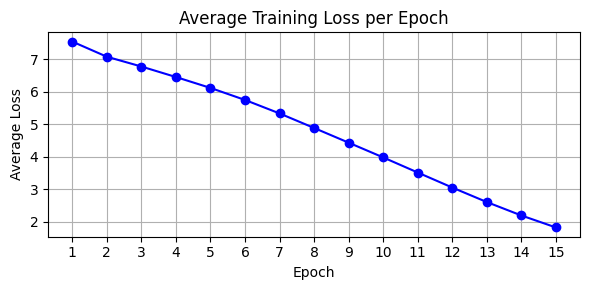

In [45]:
import matplotlib.pyplot as plt

# Plotting average training loss per epoch
plt.figure(figsize=(6, 3))
plt.plot(range(1, num_epochs + 1), epoch_loss, marker='o', linestyle='-', color='blue')
plt.title('Average Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.xticks(range(1, num_epochs + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

## Prediction function

In [46]:
import torch.nn.functional as F

def predict_next_word(model, text, word_to_index, index_to_word, sequence_length, top_k  = 5, device = device):
  model.eval()

  # Preprocess input text
  text = text.lower()
  words = text.split()  # split into tokens

  # To keep only the last 'sequence_length' words
  if len(words) < sequence_length:
    # pad with <PAD> if not enough words
    words = ['<PAD>'] * (sequence_length - len(words)) + words   # If input too short → pad on the left
  else:
    words = words[-sequence_length:]   # If too long → keep only last 28 words

  # encode words into indices
  seq = torch.tensor([word_to_index.get(w, word_to_index['<UNK>']) for w in words], dtype = torch.long).unsqueeze(0).to(device)  # unsqueeze(0) makes shape [1, 28] → batch of size 1

  # Forward Pass
  with torch.no_grad():
    logits = model(seq)     # gives [1, vocab_size]
    probs = F.softmax(logits, dim = -1).squeeze()  # apply softmax → convert logits → probabilities

  # Get top-k predictions
  top_probs, top_idxs = torch.topk(probs, top_k)  # Returns highest-probability words (Top 5 guesses)

  predictions = [(index_to_word[idx.item()], top_probs[i].item()) for i, idx in enumerate(top_idxs)]
  return predictions

In [47]:
prompt = "the man went to the"
preds = predict_next_word(model, prompt, word_to_index, index_to_word, sequence_length = 21, top_k = 5, device = device)

print(f'Prompt: {prompt}')
print('Predictions:')

for word, prob in preds:
  print(f'{word} ({prob:.4f})')

Prompt: the man went to the
Predictions:
kid (0.1052)
door (0.0777)
window. (0.0582)
left, (0.0439)
sonogram (0.0272)


In [48]:
# Prompt: the man went to the
# Predictions:
# talking (0.0406)
# cancer (0.0325)
# growing (0.0318)
# use (0.0272)
# applications (0.0232)

In [52]:
prompt = 'Artificial Intelligence is'
preds = predict_next_word(model,
                          prompt,
                          word_to_index,
                          index_to_word,
                          sequence_length = 21,
                          device = device,
                          top_k = 10)

print(f"Prompt: {prompt}")
print("Top predictions:")
for word, prob in preds:
    print(f"{word} ({prob:.4f})")

Prompt: Artificial Intelligence is
Top predictions:
ooh! (0.1260)
base-alan, (0.0593)
gonna (0.0572)
not (0.0356)
pretty (0.0348)
sweet (0.0346)
there (0.0213)
going (0.0192)
sorry. (0.0183)
'you're (0.0179)


In [50]:
# encoded (0.1383)
# costin (0.0811)
# enough (0.0323)
# considered (0.0307)
# sharma (0.0259)
# lead (0.0230)
# used (0.0188)
# but (0.0172)
# fair (0.0170)
# help (0.0157)